# Real or Fake Image - TESTING PROCESS

In [53]:
from tensorflow.keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv

In [54]:
class_names = {
    0: 'Fake', 
    1: 'Real',
 }

In [55]:
f = Path("model/gab_model_structure.json")

In [56]:
model_structure = f.read_text()

In [57]:
model = model_from_json(model_structure)

In [58]:
model.load_weights("model/gab_model_weights.h5")

# Testing

In [59]:
img = cv.imread("u_input/20220529_235758.jpg",0) #reading image 

In [60]:
gabor_1 = cv.getGaborKernel((18, 18), 1.5, np.pi/4, 5.0, 1.5, 0, ktype=cv.CV_32F) #initialising the parameters of gabor filter 
filtered_img_1 = cv.filter2D(img, cv.CV_8UC3, gabor_1) # applying gabor filter
gabor_2 = cv.getGaborKernel((18, 18), 1.5, np.pi/4, 5.0, 1.5, 0, ktype=cv.CV_32F)
filtered_img_2 = cv.filter2D(filtered_img_1, cv.CV_8UC3, gabor_2)
cv.imwrite('u_input/test.jpg', filtered_img_2)    

True

In [61]:
img = image.load_img("u_input/20220529_235758.jpg", target_size=(128, 128))

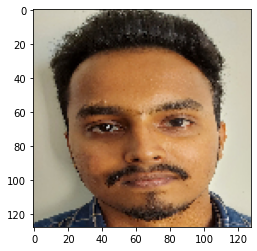

In [62]:
plt.imshow(img)
plt.show()

In [63]:
image_to_test = image.img_to_array(img)

In [64]:
list_of_images = np.expand_dims(image_to_test, axis=0)

In [65]:
results = model.predict(list_of_images)

In [66]:
#model.summary

In [67]:
for i in results:
    print(i)

[0. 1.]


In [68]:
single_result=results[0]

In [69]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]  

In [70]:
most_likely_class_index

1

In [71]:
class_label = class_names[most_likely_class_index]

In [72]:
print("Predicted class is  {} - Confidence Score: {:2f}".format(class_label, class_likelihood))

Predicted class is  Real - Confidence Score: 1.000000


# Thank You....